In [3]:
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from utils.scatter_plot import scatter_plot


In [4]:
path_hma = 'data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg'
path_hma_reservoirs = 'data/water-extent/reservoirs/hma_GDW_reservoirs.gpkg'
path_hma_reservoirs_stat = 'data/water-extent/reservoirs/hma_GDW_reservoirs_stat.gpkg'


In [5]:
### read in data
hma_gpd = gpd.read_file(path_hma)
hma_reservoirs = gpd.read_file(path_hma_reservoirs)
hma_reservoirs_stat = gpd.read_file(path_hma_reservoirs_stat)
print(hma_reservoirs.shape)
hma_reservoirs.head(2)


(485, 72)


,GDW_ID,RES_NAME,DAM_NAME,ALT_NAME,DAM_TYPE,LAKE_CTRL,RIVER,ALT_RIVER,MAIN_BASIN,SUB_BASIN,...,LONG_DAM,LAT_DAM,ORIG_SRC,POLY_SRC,GRAND_ID,HYRIV_ID,INSTREAM,HYLAK_ID,HYBAS_L12,geometry
0,287,Toktogul'skoye,Toktogul,None,Dam,None,Naryn,None,None,None,...,0.0,0.0,GRanD,SWBD,4675,40300163,Instream,1306,4120395430,"MULTIPOLYGON (((72.89472 41.84669, 72.89417 41..."
1,292,Kayrakkumskoye,Kayrakkum,Kairakkum,Dam,None,Syr-Daria,None,None,None,...,0.0,0.0,GRanD,SWBD,4686,40343454,Instream,1320,4120446290,"MULTIPOLYGON (((70.22608 40.42086, 70.22856 40..."


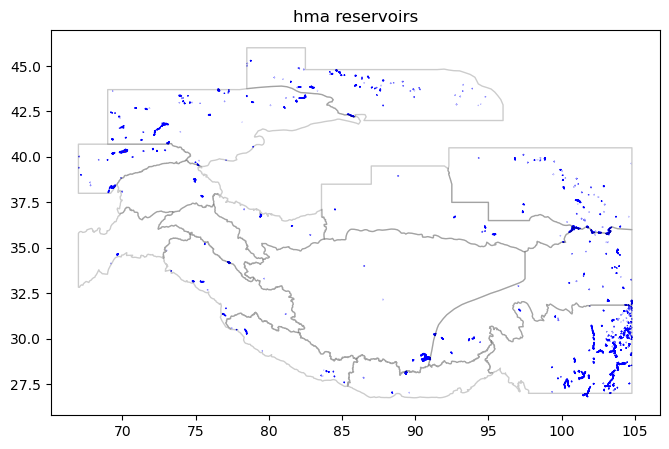

In [ ]:
### Visualization
fig, ax = plt.subplots(1,1, figsize=(8,5))
hma_reservoirs.plot(color='red', ax=ax, edgecolor='blue', linewidth=1)
hma_gpd.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.2)
ax.set_title('hma reservoirs')
# fig.savefig('figures/water-extent/hma_reservoirs.png', dpi=200, bbox_inches='tight') 


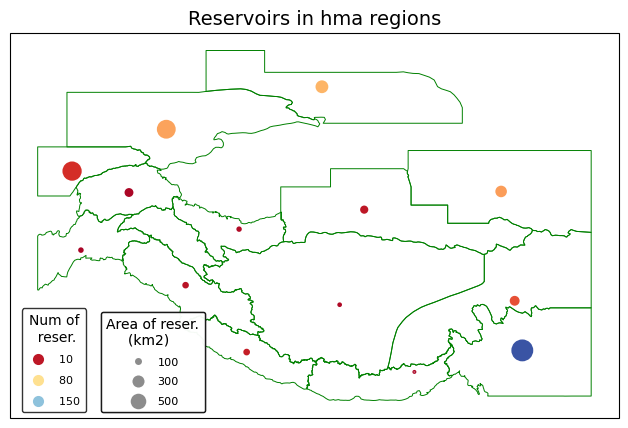

In [ ]:
region_centers = hma_reservoirs_stat.geometry.representative_point()
fig, ax = plt.subplots(1,1, figsize=(8,5), subplot_kw={'projection': ccrs.PlateCarree()})
hma_gpd.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
scatter_plot(region_centers.x.values, region_centers.y.values, 
                          size=hma_reservoirs_stat['reservoirs_area'].values,  
                          color=hma_reservoirs_stat['reservoirs_num'].values, ax=ax, 
                          title_legend_color='Num of\n  reser.', 
                          title_legend_size='Area of reser.\n     (km2)',                          
                          labels_size = [100, 300, 500], labels_color = [10, 80, 150], 
                          scale_size = 1/4, color_range=[0, 200], cmap="RdYlBu")
ax.set_title('Reservoirs in hma regions', fontsize=14)
# fig.savefig('figures/water-extent/hma_reservoirs_stats.png', dpi=200, bbox_inches='tight')
